# Getting core/universal ECs
Which ECs are shared within domains? Not many, apparently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
import collections
import seaborn as sns
sns.set()

In [36]:
### LOAD UP EC AND RXN DATA ###

with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_ecdict.json', 'r') as f:
    archaea_ecs = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_ecdict.json', 'r') as f:
    bacteria_ecs = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_ecdict.json', 'r') as f:
    eukarya_ecs = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_ecdict.json', 'r') as f:
    metagenome_ecs = json.load(f)

with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_rxnlist_dict.json', 'r') as f:
    archaea_rxns = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_rxnlist_dict.json', 'r') as f:
    bacteria_rxns = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_rxnlist_dict.json', 'r') as f:
    eukarya_rxns = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/metagenomes/metagenome_rxnlist_dict.json', 'r') as f:
    metagenome_rxns = json.load(f)

In [5]:
def get_universal_ecs(ec_frac_dict, minimum_ecs):
    
    universal_dict = {}
    
    for k,v in ec_frac_dict.items():     
        if v >= 0.99:
            print("yeet")
            universal_dict[k] = v

    #universal_dict = {k: ec_frac_dict[k] for k,v in ec_frac_dict.items() if v >= 0.9}
    return universal_dict

In [6]:
def meta_list(list_of_ecs):
    extended = []
    for i in list_of_ecs.values():
        extended.extend(i)
    counter = collections.Counter(extended)
    unique_ecs = len(counter)
    return unique_ecs, counter

In [16]:
def ec_frac_dict(ec_dict, minimum_ecs):
    extended = []
    ecs = list(ec_dict.values())
    ecs = [i for i in ecs if len(i) > minimum_ecs]
    for i in ecs:
        extended.extend(i)
    counter = collections.Counter(extended)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(ec_dict)
        frac_dict[i] = frac
        
    values = np.fromiter(frac_dict.values(), dtype=float)
    weights = np.ones_like(values)/float(len(values))
        
    return(frac_dict, values, weights)

In [8]:
def rxn_frac_dict(rxn_dict, minimum_rxns):
    extended = []
    ecs = list(rxn_dict.values())
    ecs = [i for i in ecs if len(i) > minimum_rxns]
    for i in ecs:
        extended.extend(i)
    counter = collections.Counter(extended)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(rxn_dict)
        frac_dict[i] = frac
        
    values = np.fromiter(frac_dict.values(), dtype=float)
    weights = np.ones_like(values)/float(len(values))
    
    return(frac_dict, values, weights)

In [9]:
def reduced_ec_frac_dict(ec_dict, minimum_ecs):
    extended = []
    ecs = list(ec_dict.values())
    ecs = [i for i in ecs if len(i) > minimum_ecs]
    for i in ecs:
        extended.extend(i)
    #return(extended)
    counter = collections.Counter(extended)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(ec_dict)
        frac_dict[i] = frac
    
    reduced_frac_dict = {k: frac_dict[k] for k,v in frac_dict.items() if v >= 0.10}
    reduced_values = np.fromiter(reduced_frac_dict.values(), dtype=float)
    reduced_weights = np.ones_like(reduced_values)/float(len(reduced_values))
    
    return(reduced_frac_dict, reduced_values, reduced_weights)

In [10]:
def reduced_rxn_frac_dict(rxn_dict, minimum_rxns):
    extended = []
    rxns = list(rxn_dict.values())
    rxns = [i for i in rxns if len(i) > minimum_rxns]
    for i in rxns:
        extended.extend(i)
    counter = collections.Counter(extended)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(rxn_dict)
        frac_dict[i] = frac
    
    reduced_frac_dict = {k: frac_dict[k] for k,v in frac_dict.items() if v >= 0.10}
    reduced_values = np.fromiter(reduced_frac_dict.values(), dtype=float)
    reduced_weights = np.ones_like(reduced_values)/float(len(reduced_values))
    
    return(reduced_frac_dict, reduced_values, reduced_weights)

In [18]:
bacteria_ecfrac_dict, bacteria_ecfracs, bacteria_ecweights = ec_frac_dict(bacteria_ecs, 10)
archaea_ecfrac_dict, archaea_ecfracs, archaea_ecweights = ec_frac_dict(archaea_ecs, 10)
eukarya_ecfrac_dict, eukarya_ecfracs, eukarya_ecweights = ec_frac_dict(eukarya_ecs, 10)
metagenome_ecfrac_dict, metagenome_ecfracs, metagenome_ecweights = ec_frac_dict(metagenomes_ecs, 50)

#sorted(eukarya_ecfrac_dict.values(), reverse=True)

In [28]:
#bacteria_ecfrac_dict, bacteria_ecfracs, bacteria_ecweights = ec_frac_dict(bacteria_ecs, 100)
#archaea_ecfrac_dict, archaea_ecfracs, archaea_ecweights = ec_frac_dict(archaea_ecs, 100)
#eukarya_ecfrac_dict, eukarya_ecfracs, eukarya_ecweights = ec_frac_dict(eukarya_ecs, 100)
#metagenome_ecfrac_dict, metagenome_ecfracs, metagenome_ecweights = ec_frac_dict(metagenomes_ecs, 500)

archaea_rxnfrac_dict, archaea_rxnfracs, archaea_rxnweights = rxn_frac_dict(archaea_rxns, 100)
bacteria_rxnfrac_dict, bacteria_rxnfracs, bacteria_rxnweights = rxn_frac_dict(bacteria_rxns, 100)
eukarya_rxnfrac_dict, eukarya_rxnfracs, eukarya_rxnweights = rxn_frac_dict(eukarya_rxns, 100)
metagenome_rxnfrac_dict, metagenome_rxnfracs, metagenome_rxnweights = rxn_frac_dict(metagenome_rxns, 500)



In [20]:
reduced_bacteria_ec_dict, reduced_bacteria_ecfracs, reduced_bacteria_ecweights = reduced_ec_frac_dict(bacteria_ecs, 10)
reduced_archaea_ec_dict, reduced_archaea_ecfracs, reduced_archaea_ecweights = reduced_ec_frac_dict(archaea_ecs, 10)
reduced_eukarya_ec_dict, reduced_eukarya_ecfracs, reduced_eukarya_ecweights = reduced_ec_frac_dict(eukarya_ecs, 10)
reduced_metagenome_ec_dict, reduced_metagenome_ecfracs, reduced_metagenome_ecweights = reduced_ec_frac_dict(metagenomes_ecs, 50)

reduced_bacteria_rxn_dict, reduced_bacteria_rxnfracs, reduced_bacteria_rxnweights = reduced_rxn_frac_dict(bacteria_rxns, 10)
reduced_archaea_rxn_dict, reduced_archaea_rxnfracs, reduced_archaea_rxnweights = reduced_rxn_frac_dict(archaea_rxns, 10)
reduced_eukarya_rxn_dict, reduced_eukarya_rxnfracs, reduced_eukarya_rxnweights = reduced_rxn_frac_dict(eukarya_rxns, 10)
reduced_metagenome_rxn_dict, reduced_metagenome_rxnfracs, reduced_metagenome_rxnweights = reduced_rxn_frac_dict(metagenome_rxns, 50)


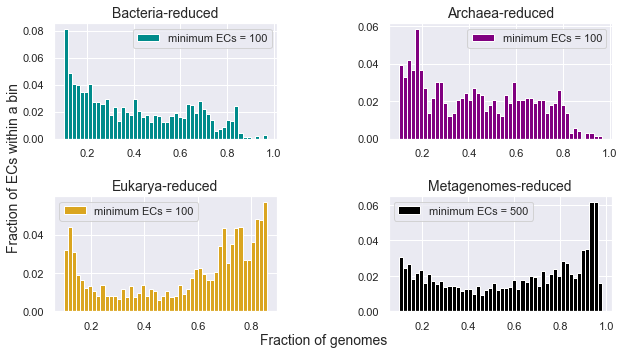

In [21]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  0.125,  
    right   =  0.9, 
    bottom  =  0.1,
    top     =  0.9, 
    wspace  =  0.5, 
    hspace  =  0.5
)

ax[0][0].set_title('Bacteria-reduced', fontsize=14)
ax[0][1].set_title('Archaea-reduced', fontsize=14)
ax[1][0].set_title('Eukarya-reduced', fontsize=14)
ax[1][1].set_title('Metagenomes-reduced', fontsize=14)

fig.text(0.5, 0.01, 'Fraction of genomes', ha='center', fontsize=14)
fig.text(0.07, 0.5, "Fraction of ECs within a bin", ha="center", va="center", rotation=90, fontsize=14)

ax[0][0].hist(reduced_bacteria_ecfracs, bins=50, weights=reduced_bacteria_ecweights, color='darkcyan')
ax[0][1].hist(reduced_archaea_ecfracs, bins=50, weights=reduced_archaea_ecweights, color='purple')
ax[1][0].hist(reduced_eukarya_ecfracs, bins=50, weights=reduced_eukarya_ecweights, color='goldenrod')
ax[1][1].hist(reduced_metagenome_ecfracs, bins=50, weights=reduced_metagenome_ecweights, color='black')

ax[0][0].legend(['minimum ECs = 100'])
ax[0][1].legend(['minimum ECs = 100'])
ax[1][0].legend(['minimum ECs = 100'])
ax[1][1].legend(['minimum ECs = 500'])

plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/reduced_ec_coverage_hist100')



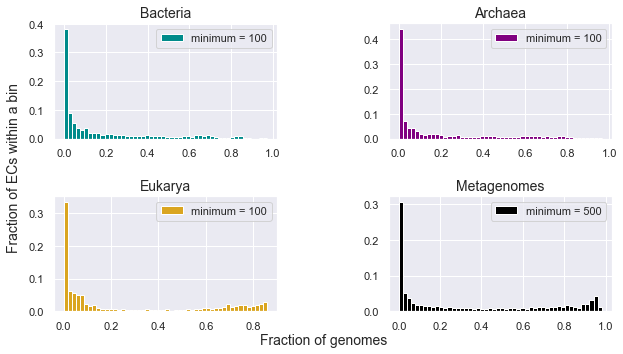

In [22]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  0.125,  
    right   =  0.9, 
    bottom  =  0.1,
    top     =  0.9, 
    wspace  =  0.5, 
    hspace  =  0.5
)

ax[0][0].set_title('Bacteria', fontsize=14)
ax[0][1].set_title('Archaea', fontsize=14)
ax[1][0].set_title('Eukarya', fontsize=14)
ax[1][1].set_title('Metagenomes', fontsize=14)

fig.text(0.5, 0.01, 'Fraction of genomes', ha='center', fontsize=14)
fig.text(0.07, 0.5, "Fraction of ECs within a bin", ha="center", va="center", rotation=90, fontsize=14)

ax[0][0].hist(bacteria_ecfracs, bins=50, weights=bacteria_ecweights, color='darkcyan', label='minimum = 100')
ax[0][1].hist(archaea_ecfracs, bins=50, weights=archaea_ecweights, color='purple', label='minimum = 100')
ax[1][0].hist(eukarya_ecfracs, bins=50, weights=eukarya_ecweights, color='goldenrod', label='minimum = 100')
ax[1][1].hist(metagenome_ecfracs, bins=50, weights=metagenome_ecweights, color='black', label='minimum = 500')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/ec_coverage_hist100')


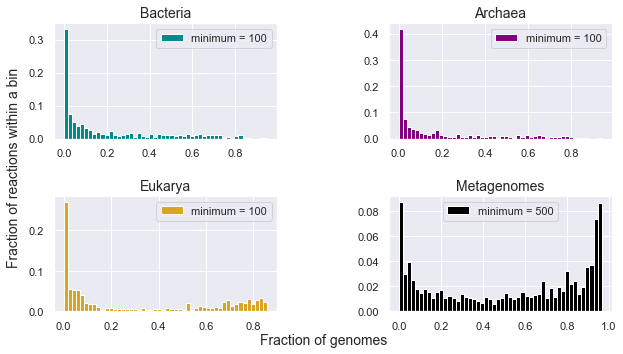

In [23]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  0.125,  
    right   =  0.9, 
    bottom  =  0.1,
    top     =  0.9, 
    wspace  =  0.5, 
    hspace  =  0.5
)

ax[0][0].set_title('Bacteria', fontsize=14)
ax[0][1].set_title('Archaea', fontsize=14)
ax[1][0].set_title('Eukarya', fontsize=14)
ax[1][1].set_title('Metagenomes', fontsize=14)

fig.text(0.5, 0.01, 'Fraction of genomes', ha='center', fontsize=14)
fig.text(0.07, 0.5, "Fraction of reactions within a bin", ha="center", va="center", rotation=90, fontsize=14)

ax[0][0].hist(bacteria_rxnfracs, bins=50, weights=bacteria_rxnweights, color='darkcyan', label='minimum = 100')
ax[0][1].hist(archaea_rxnfracs, bins=50, weights=archaea_rxnweights, color='purple', label='minimum = 100')
ax[1][0].hist(eukarya_rxnfracs, bins=50, weights=eukarya_rxnweights, color='goldenrod', label='minimum = 100')
ax[1][1].hist(metagenome_rxnfracs, bins=50, weights=metagenome_rxnweights, color='black', label='minimum = 500')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/rxn_coverage_hist100')


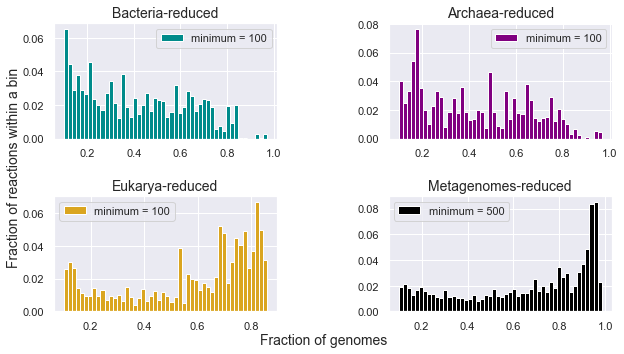

In [24]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  0.125,  
    right   =  0.9, 
    bottom  =  0.1,
    top     =  0.9, 
    wspace  =  0.5, 
    hspace  =  0.5
)

ax[0][0].set_title('Bacteria-reduced', fontsize=14)
ax[0][1].set_title('Archaea-reduced', fontsize=14)
ax[1][0].set_title('Eukarya-reduced', fontsize=14)
ax[1][1].set_title('Metagenomes-reduced', fontsize=14)

fig.text(0.5, 0.01, 'Fraction of genomes', ha='center', fontsize=14)
fig.text(0.07, 0.5, "Fraction of reactions within a bin", ha="center", va="center", rotation=90, fontsize=14)

ax[0][0].hist(reduced_bacteria_rxnfracs, bins=50, weights=reduced_bacteria_rxnweights, color='darkcyan', label='minimum = 100')
ax[0][1].hist(reduced_archaea_rxnfracs, bins=50, weights=reduced_archaea_rxnweights, color='purple', label='minimum = 100')
ax[1][0].hist(reduced_eukarya_rxnfracs, bins=50, weights=reduced_eukarya_rxnweights, color='goldenrod', label='minimum = 100')
ax[1][1].hist(reduced_metagenome_rxnfracs, bins=50, weights=reduced_metagenome_rxnweights, color='black', label='minimum = 500')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/reduced_rxn_coverage_hist100')


In [31]:
sorted(eukarya_ecfrac_dict.values(), reverse=True)

[0.8577464788732394,
 0.8577464788732394,
 0.8577464788732394,
 0.8577464788732394,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.852112676056338,
 0.852112676056338,
 0.852112676056338,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8492957746478873,
 0.8492957746478873,
 0.8492957746478873,
 0.8492957746478873,
 0.847887323943662,
 0.847887323943662,
 0.8

In [30]:
sorted(eukarya_rxnfrac_dict.values(), reverse=True)

[0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.856338028169014,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8549295774647887,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.8535211267605634,
 0.852112676056338,
 0.852112676056338,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8507042253521127,
 0.8492957746478873,
 0.8492957746478873,
 0.8492957746478873,
 0.8492957746478873,
 0.847887323943662,
 0.847887323943662,
 0.847887323943662,
 0.847887323943662,
 0.8464788732394366,
 0.8464788732394366,
 0.8464788732394366,
 0.8464788732394366,
 0.84647887

In [ ]:
baba = frac_dict(ba) ### make counter dict
ca = dict(Counter(baba).most_common()) ### order dict by values
da = {k: ca[k] for k,v in ca.items() if v >= 0.99} ### subset dict by alues


In [ ]:
plt.hist(eukarya_ecfracs, bins=50, weights=eukarya_ecweights)

In [ ]:
### example stuff from other code ###

arch_rxnfracs = np.fromiter(arch_frac_dict.values(), dtype=float)
arch_rxnweights = np.ones_like(arch_rxnfracs)/float(len(arch_rxnfracs))


plt.hist(arch_rxnfracs, bins=50, weights=arch_rxnweights, color='purple', alpha=0.3, label='archaea')
plt.hist(bact_rxnfracs, bins=50, weights=bact_rxnweights, color='darkcyan', alpha=0.5, label='bacteria')
plt.hist(euk_rxnfracs, bins=50, weights=euk_rxnweights, color='goldenrod', alpha=0.3, label='eukarya')
plt.hist(eco_rxnfracs, bins=50, weights=eco_rxnweights, color='black', alpha=0.3, label='ecosystem')
plt.xlabel('fraction of occurrences of a given rxn across domain')
plt.ylabel('probability of given fractional occurence')
plt.title('freq distributions of rxns across domains of life')
plt.legend(loc='best')
plt.savefig('alldomains_freqdist_normed')
plt.show()
